In [41]:
import pandas as pd

covid_ind = pd.read_excel(r'dataset/Covid_data_India.xlsx')
covid_ind = covid_ind[["State/UT","Active Cases","Cured/Discharged/Migrated","Deaths"]]
print(covid_ind.shape)
covid_ind.head()

(36, 4)


,State/UT,Active Cases,Cured/Discharged/Migrated,Deaths
0,Andaman and Nicobar Islands,24,9862,129
1,Andhra Pradesh,5181,2297065,14718
2,Arunachal Pradesh,239,63837,296
3,Assam,1691,715710,6637
4,Bihar,432,817169,12255


In [42]:
perc_missing_per_ftr = covid_ind.isnull().sum(axis=0)/covid_ind.shape[0]
print(perc_missing_per_ftr)
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(covid_ind[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(covid_ind.isnull().sum(axis=1)!=0)/covid_ind.shape[0]
print('fraction of points with missing values:',frac_missing)

State/UT                     0.0
Active Cases                 0.0
Cured/Discharged/Migrated    0.0
Deaths                       0.0
dtype: float64
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [43]:
covid_ind = covid_ind.drop_duplicates(subset = ["State/UT"])

In [44]:
covid_ind.describe()

,Active Cases,Cured/Discharged/Migrated,Deaths
count,36.000000,3.600000e+01,36.000000
mean,4121.083333,1.172775e+06,14247.888889
std,8359.701592,1.731085e+06,26089.528786
min,3.000000,9.862000e+03,4.000000
25%,258.250000,9.780000e+04,1102.750000
50%,1630.500000,5.811220e+05,5976.000000
75%,4570.250000,1.263098e+06,14196.000000
max,48152.000000,7.702217e+06,143656.000000


In [155]:
covid_ind.dtypes

State/UT                     object
Active Cases                  int64
Cured/Discharged/Migrated     int64
Deaths                        int64
dtype: object

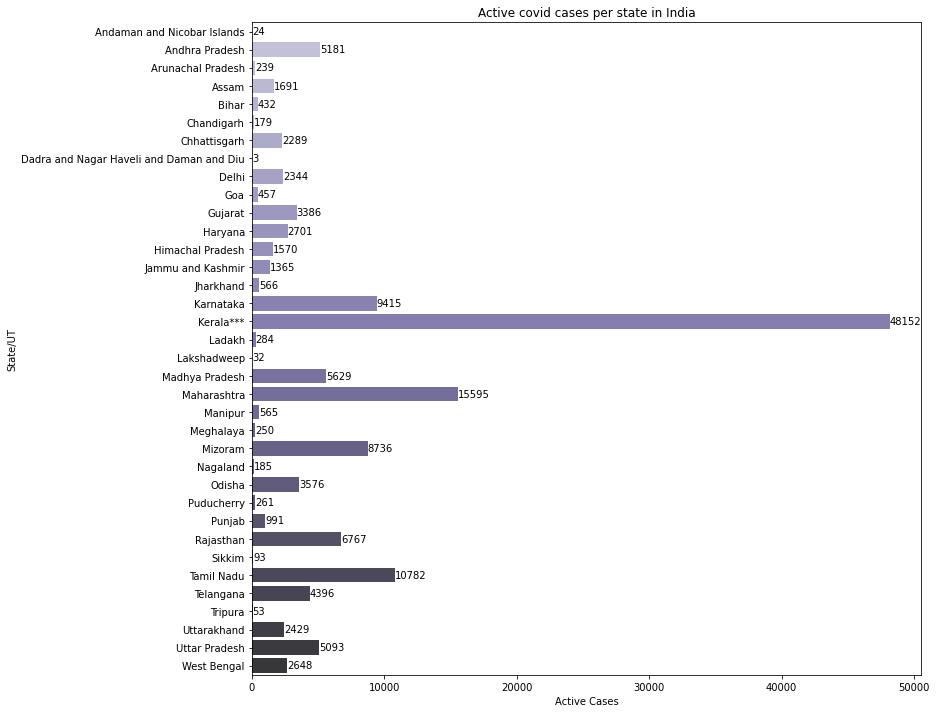

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,12))
g = sns.barplot(y="State/UT", x="Active Cases", data=covid_ind, palette="Purples_d")
g.set_title("Active covid cases per state in India")
g.bar_label(g.containers[0])
plt.show()


In [46]:
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point

fp = r'Maps_with_python/india-polygon.shp'
map_val = gpd.read_file(fp)
map_val.rename(columns = {'st_nm':'State/UT'}, inplace = True)
map_val.head()


,id,State/UT,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [47]:
map_val['States/UT'] = map_val['State/UT'].str.replace('&','and')
map_val['States/UT'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_val['States/UT'].replace('Telangana', 
                              'Telengana', inplace = True)
map_val['States/UT'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_val['States/UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [48]:
geo_data = pd.merge(map_val, covid_ind, 
                       how = 'left', on = 'State/UT')
geo_data.fillna(0, inplace = True)
geo_data.drop('id', axis = 1, inplace = True)
geo_data.head()

,State/UT,geometry,States/UT,Active Cases,Cured/Discharged/Migrated,Deaths
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",Andaman and Nicobar Islands,24.0,9862.0,129.0
1,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",Arunachal Pradesh,239.0,63837.0,296.0
2,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,1691.0,715710.0,6637.0
3,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,432.0,817169.0,12255.0
4,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",Chandigarh,179.0,90290.0,1164.0


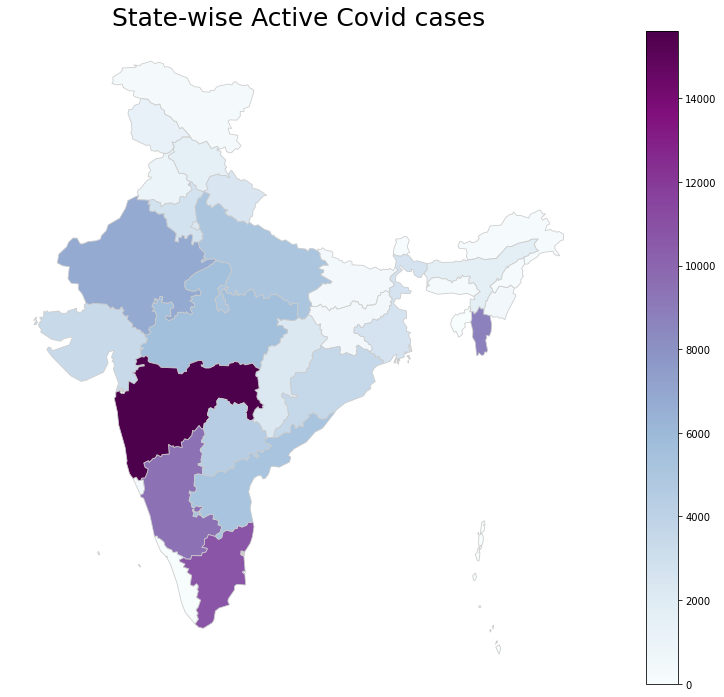

In [49]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('State-wise Active Covid cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
geo_data.plot(column = 'Active Cases', cmap='BuPu', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

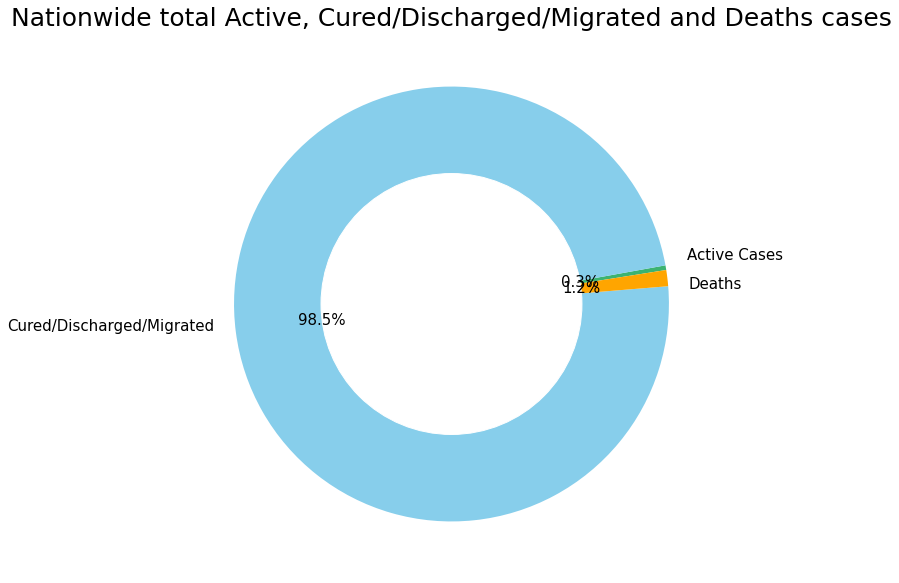

In [131]:
group_size = [sum(covid_ind['Active Cases']),
              sum(covid_ind['Cured/Discharged/Migrated']),
              sum(covid_ind['Deaths'])
             ]
group_labels = ['Active Cases\n',
                'Cured/Discharged/Migrated\n',
                '\n\nDeaths\n'
               ]
plt.figure(figsize= (10,10))
custom_colors = ['mediumseagreen', 'skyblue','orange']
plt.pie(group_size, labels = group_labels, autopct='%1.1f%%', startangle=9,colors = custom_colors)
central_circle = plt.Circle((0,0), 0.6, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 15)
plt.title('Nationwide total Active, Cured/Discharged/Migrated and Deaths cases', fontsize = 25)
plt.show()

In [197]:
vaccine_ind = pd.read_excel(r'dataset/Vaccine_data_India.xlsx')
vaccine_ind = vaccine_ind[["State/UT","18+ 1st Dose","18+ 2nd Dose","15-18 1st Dose","15-18 2nd Dose","Precaution Dose","Total Doses"]]
print(vaccine_ind.shape)
vaccine_ind.head()

(38, 7)


,State/UT,18+ 1st Dose,18+ 2nd Dose,15-18 1st Dose,15-18 2nd Dose,Precaution Dose,Total Doses
0,A & N Islands,"3,09,856","3,05,225","18,577","14,668","8,518","6,56,844"
1,Andhra Pradesh,"4,05,19,498","3,83,33,680","25,14,812","18,08,757","13,20,008","8,44,96,755"
2,Arunachal Pradesh,"8,45,351","6,96,979","41,150","18,886","22,733","16,25,099"
3,Assam,"2,23,88,497","1,88,64,537","9,67,678","5,55,045","2,42,981","4,30,18,738"
4,Bihar,"6,12,13,625","5,02,11,048","48,24,827","13,45,677","7,15,950","11,83,11,127"


In [198]:
perc_missing_per_ftr = vaccine_ind.isnull().sum(axis=0)/vaccine_ind.shape[0]
print(perc_missing_per_ftr)
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(vaccine_ind[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(vaccine_ind.isnull().sum(axis=1)!=0)/covid_ind.shape[0]
print('fraction of points with missing values:',frac_missing)

State/UT           0.0
18+ 1st Dose       0.0
18+ 2nd Dose       0.0
15-18 1st Dose     0.0
15-18 2nd Dose     0.0
Precaution Dose    0.0
Total Doses        0.0
dtype: float64
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [199]:
vaccine_ind = vaccine_ind[vaccine_ind["State/UT"] != "Miscellaneous"]

In [200]:
vaccine_ind = vaccine_ind.drop_duplicates(subset = ["State/UT"])

In [201]:
vaccine_ind.describe()
vaccine_ind.dtypes

State/UT           object
18+ 1st Dose       object
18+ 2nd Dose       object
15-18 1st Dose     object
15-18 2nd Dose     object
Precaution Dose    object
Total Doses        object
dtype: object

In [202]:
vaccine_ind['18+ 1st Dose'] = vaccine_ind['18+ 1st Dose'].str.replace(',','').astype(int)
vaccine_ind['18+ 2nd Dose'] = vaccine_ind['18+ 2nd Dose'].str.replace(',','').astype(int)
vaccine_ind['15-18 1st Dose'] = vaccine_ind['15-18 1st Dose'].str.replace(',','').astype(int)
vaccine_ind['15-18 2nd Dose'] = vaccine_ind['15-18 2nd Dose'].str.replace(',','').astype(int)
vaccine_ind['Precaution Dose'] = vaccine_ind['Precaution Dose'].str.replace(',','').astype(int)
vaccine_ind['Total Doses'] = vaccine_ind['Total Doses'].str.replace(',','').astype(int)

vaccine_ind.dtypes

State/UT           object
18+ 1st Dose        int64
18+ 2nd Dose        int64
15-18 1st Dose      int64
15-18 2nd Dose      int64
Precaution Dose     int64
Total Doses         int64
dtype: object

In [203]:
vaccine_ind.head()

,State/UT,18+ 1st Dose,18+ 2nd Dose,15-18 1st Dose,15-18 2nd Dose,Precaution Dose,Total Doses
0,A & N Islands,309856,305225,18577,14668,8518,656844
1,Andhra Pradesh,40519498,38333680,2514812,1808757,1320008,84496755
2,Arunachal Pradesh,845351,696979,41150,18886,22733,1625099
3,Assam,22388497,18864537,967678,555045,242981,43018738
4,Bihar,61213625,50211048,4824827,1345677,715950,118311127


In [204]:
vac_data = pd.merge(map_val, vaccine_ind, 
                       how = 'left', on = 'State/UT')
vac_data.fillna(0, inplace = True)
vac_data.drop('id', axis = 1, inplace = True)
vac_data.head()

,State/UT,geometry,States/UT,18+ 1st Dose,18+ 2nd Dose,15-18 1st Dose,15-18 2nd Dose,Precaution Dose,Total Doses
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",Arunachal Pradesh,845351.0,696979.0,41150.0,18886.0,22733.0,1625099.0
2,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,22388497.0,18864537.0,967678.0,555045.0,242981.0,43018738.0
3,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,61213625.0,50211048.0,4824827.0,1345677.0,715950.0,118311127.0
4,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",Chandigarh,1080397.0,864770.0,41955.0,16316.0,23595.0,2027033.0


In [204]:
vac_data = pd.merge(map_val, vaccine_ind, 
                       how = 'left', on = 'State/UT')
vac_data.fillna(0, inplace = True)
vac_data.drop('id', axis = 1, inplace = True)
vac_data.head()

,State/UT,geometry,States/UT,18+ 1st Dose,18+ 2nd Dose,15-18 1st Dose,15-18 2nd Dose,Precaution Dose,Total Doses
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",Arunachal Pradesh,845351.0,696979.0,41150.0,18886.0,22733.0,1625099.0
2,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,22388497.0,18864537.0,967678.0,555045.0,242981.0,43018738.0
3,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,61213625.0,50211048.0,4824827.0,1345677.0,715950.0,118311127.0
4,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",Chandigarh,1080397.0,864770.0,41955.0,16316.0,23595.0,2027033.0


In [204]:
vac_data = pd.merge(map_val, vaccine_ind, 
                       how = 'left', on = 'State/UT')
vac_data.fillna(0, inplace = True)
vac_data.drop('id', axis = 1, inplace = True)
vac_data.head()

,State/UT,geometry,States/UT,18+ 1st Dose,18+ 2nd Dose,15-18 1st Dose,15-18 2nd Dose,Precaution Dose,Total Doses
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",Arunachal Pradesh,845351.0,696979.0,41150.0,18886.0,22733.0,1625099.0
2,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,22388497.0,18864537.0,967678.0,555045.0,242981.0,43018738.0
3,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,61213625.0,50211048.0,4824827.0,1345677.0,715950.0,118311127.0
4,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",Chandigarh,1080397.0,864770.0,41955.0,16316.0,23595.0,2027033.0


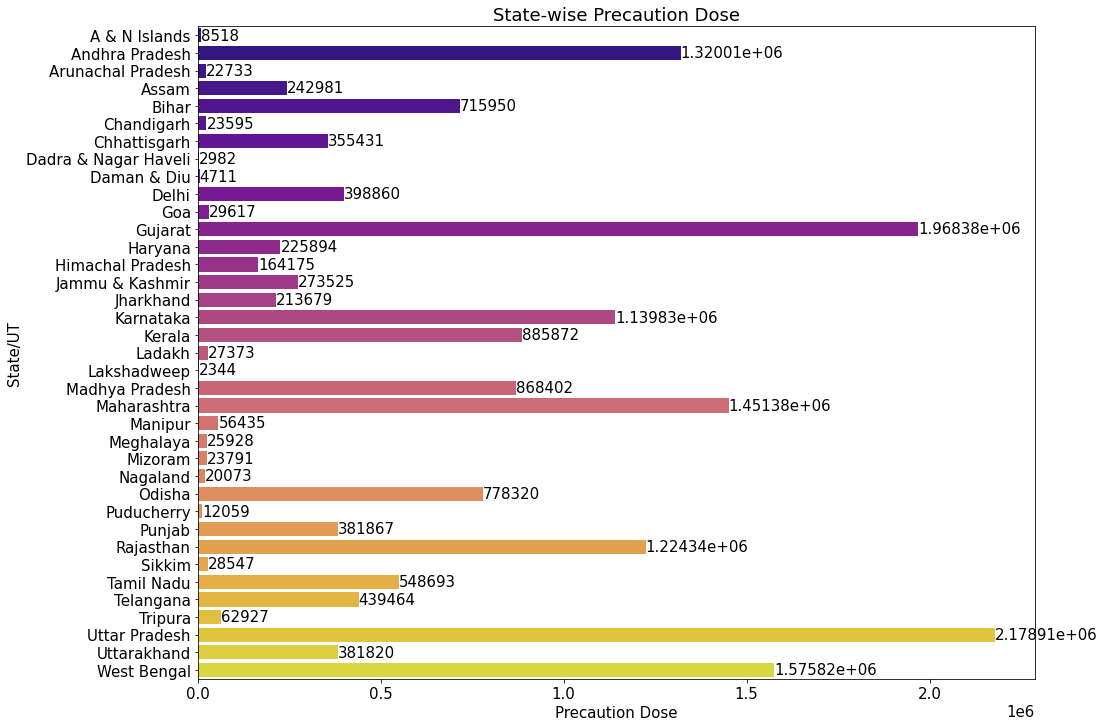

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,12))
g = sns.barplot(y="State/UT", x="Precaution Dose", data=vaccine_ind, palette="plasma")
g.set_title("State-wise Precaution Dose")
g.bar_label(g.containers[0])
plt.show()

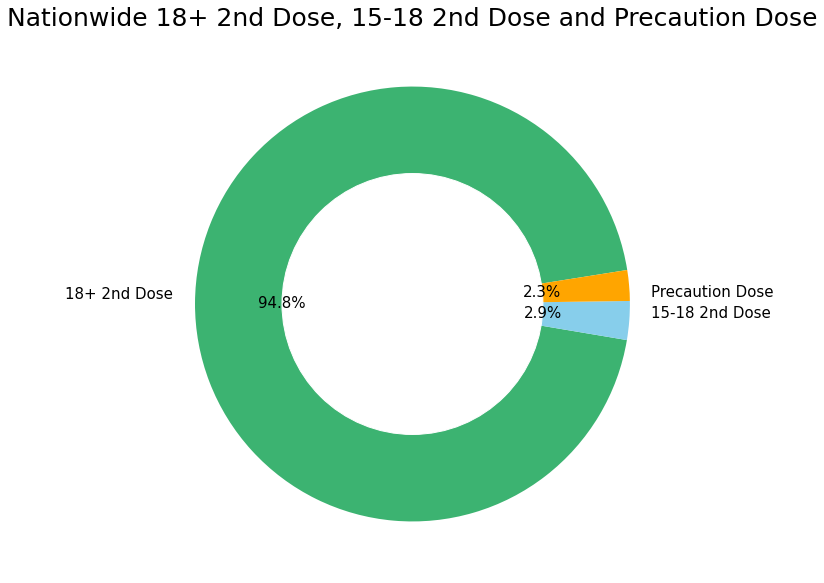

In [222]:
group_size = [sum(vaccine_ind['18+ 2nd Dose']),
              sum(vaccine_ind['15-18 2nd Dose']),
              sum(vaccine_ind['Precaution Dose'])
             ]
group_labels = ['18+ 2nd Dose\n',
                '15-18 2nd Dose\n',
                '\n\nPrecaution Dose\n'
               ]
plt.figure(figsize= (10,10))
custom_colors = ['mediumseagreen', 'skyblue','orange']
plt.pie(group_size, labels = group_labels, autopct='%1.1f%%', startangle=9,colors = custom_colors)
central_circle = plt.Circle((0,0), 0.6, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 15)
plt.title('Nationwide 18+ 2nd Dose, 15-18 2nd Dose and Precaution Dose', fontsize = 25)
plt.show()

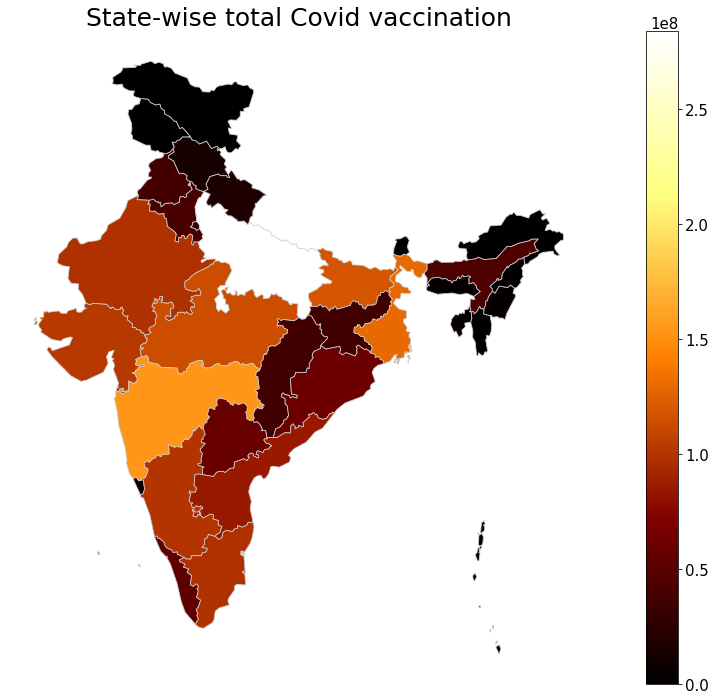

In [219]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('State-wise total Covid vaccination', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
vac_data.plot(column = 'Total Doses', cmap='afmhot', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()